<a href="https://colab.research.google.com/github/PrateekCoder/lets_data_science/blob/main/Polynomial_Regression_Exploring_Non_Linear_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the Data

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

import pandas as pd
data = pd.DataFrame(data=california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

## Visualize the Data

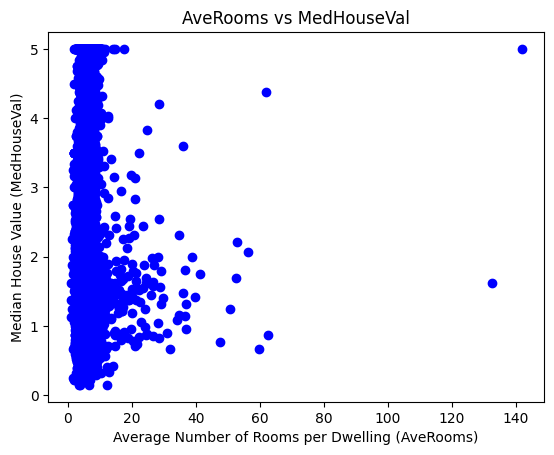

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data['AveRooms'], data['MedHouseVal'], color = 'blue')
plt.xlabel('Average Number of Rooms per Dwelling (AveRooms)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('AveRooms vs MedHouseVal')
plt.show()

## Create Polynomial Features

In [4]:
from sklearn.preprocessing import PolynomialFeatures

X = data['AveRooms']
y = data['MedHouseVal']

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X.values.reshape(-1, 1))

## Train the Model

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

## Visualize the Result

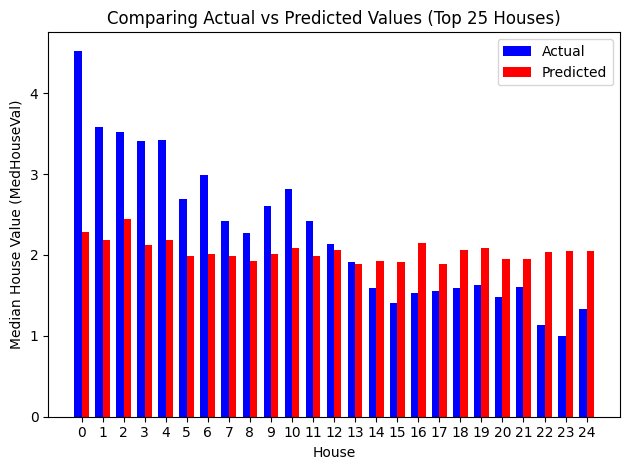

In [7]:
import numpy as np

# Generate predictions
y_pred = model.predict(x_poly)

# Limiting the data to 25 for clear visualization
num_values = 25
index = np.arange(num_values)
bar_width = 0.35

# Actual values
plt.bar(index, y[:num_values], bar_width, color='b', label='Actual')

# Predicted values
plt.bar(index+bar_width, y_pred[:num_values], bar_width, color='r', label='Predicted')

plt.xlabel('House')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('Comparing Actual vs Predicted Values (Top 25 Houses)')
plt.xticks(index + bar_width/2, np.array([i for i in range(num_values)]))  # set labels to the middle of the bars
plt.legend()
plt.tight_layout()  # makes room for the labels
plt.show()

## Evaluate the Model

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Predicting the target values using our trained model
y_pred = model.predict(x_poly)

# Calculating and printing RMSE
rmse = sqrt(mean_squared_error(y, y_pred))
print("RMSE: ", rmse)

# Calculating and printing R2 score
r2 = r2_score(y, y_pred)
print("R2 score: ", r2)

RMSE:  1.1297830001097509
R2 score:  0.041410882293692275
